In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Information Theory Lab 2
## Differential Entropy Estimation

### Ex 1: Empirical estimate of differetial entropy for a single continuous random variable

In [2]:
#delta is the discretization parameter
#if delta is not given than the discretization is decided by numpy
def pdf(sequence, delta=False):
    if (delta == False):
        hist = np.histogram(sequence, density=True)
    else:
        nbins=int(np.ceil((np.max(sequence)-np.min(sequence))/delta))
        hist= np.histogram(sequence, bins=nbins, density=True)
    return hist[0], hist[1]  

def differential_entropy(density, bins):
    #delete zeros
    index=density!=0
    density=density[index].copy()
    index=np.append(index,True) #nbins=nvalues+1
    bins=bins[index].copy()

    delta= np.diff(bins)
    diff_info= -np.log2(density) 
    
    return np.dot(diff_info, density*delta) 


def differential_entropy_nats(density, bins):
    #delete zeros
    index=density!=0
    density=density[index].copy()
    index=np.append(index,True) #nbins=nvalues+1
    bins=bins[index].copy()

    delta= np.diff(bins)
    diff_info= -np.log(density) #nats
    
    return np.dot(diff_info, density*delta) 

### Ex 2: Testing results of Ex 1

In [3]:
def theo_diff_entropy(param, type):
    if type=="gaussian":
        sigma_sq=param**2
        return 0.5*np.log2(2*np.pi*sigma_sq*np.e)
    if type=="uniform":
        A=param
        return np.log2(A)
    if type=="exponential":
        l=param
        return 1-np.log2(l)

def theo_diff_entropy_nats(param, type):
    if type=="gaussian":
        sigma_sq=param**2
        return 0.5*np.log(2*np.pi*sigma_sq*np.e)
    if type=="uniform":
        A=param
        return np.log(A)
    if type=="exponential":
        l=param
        return 1-np.log(l)

 Gaussian distribution

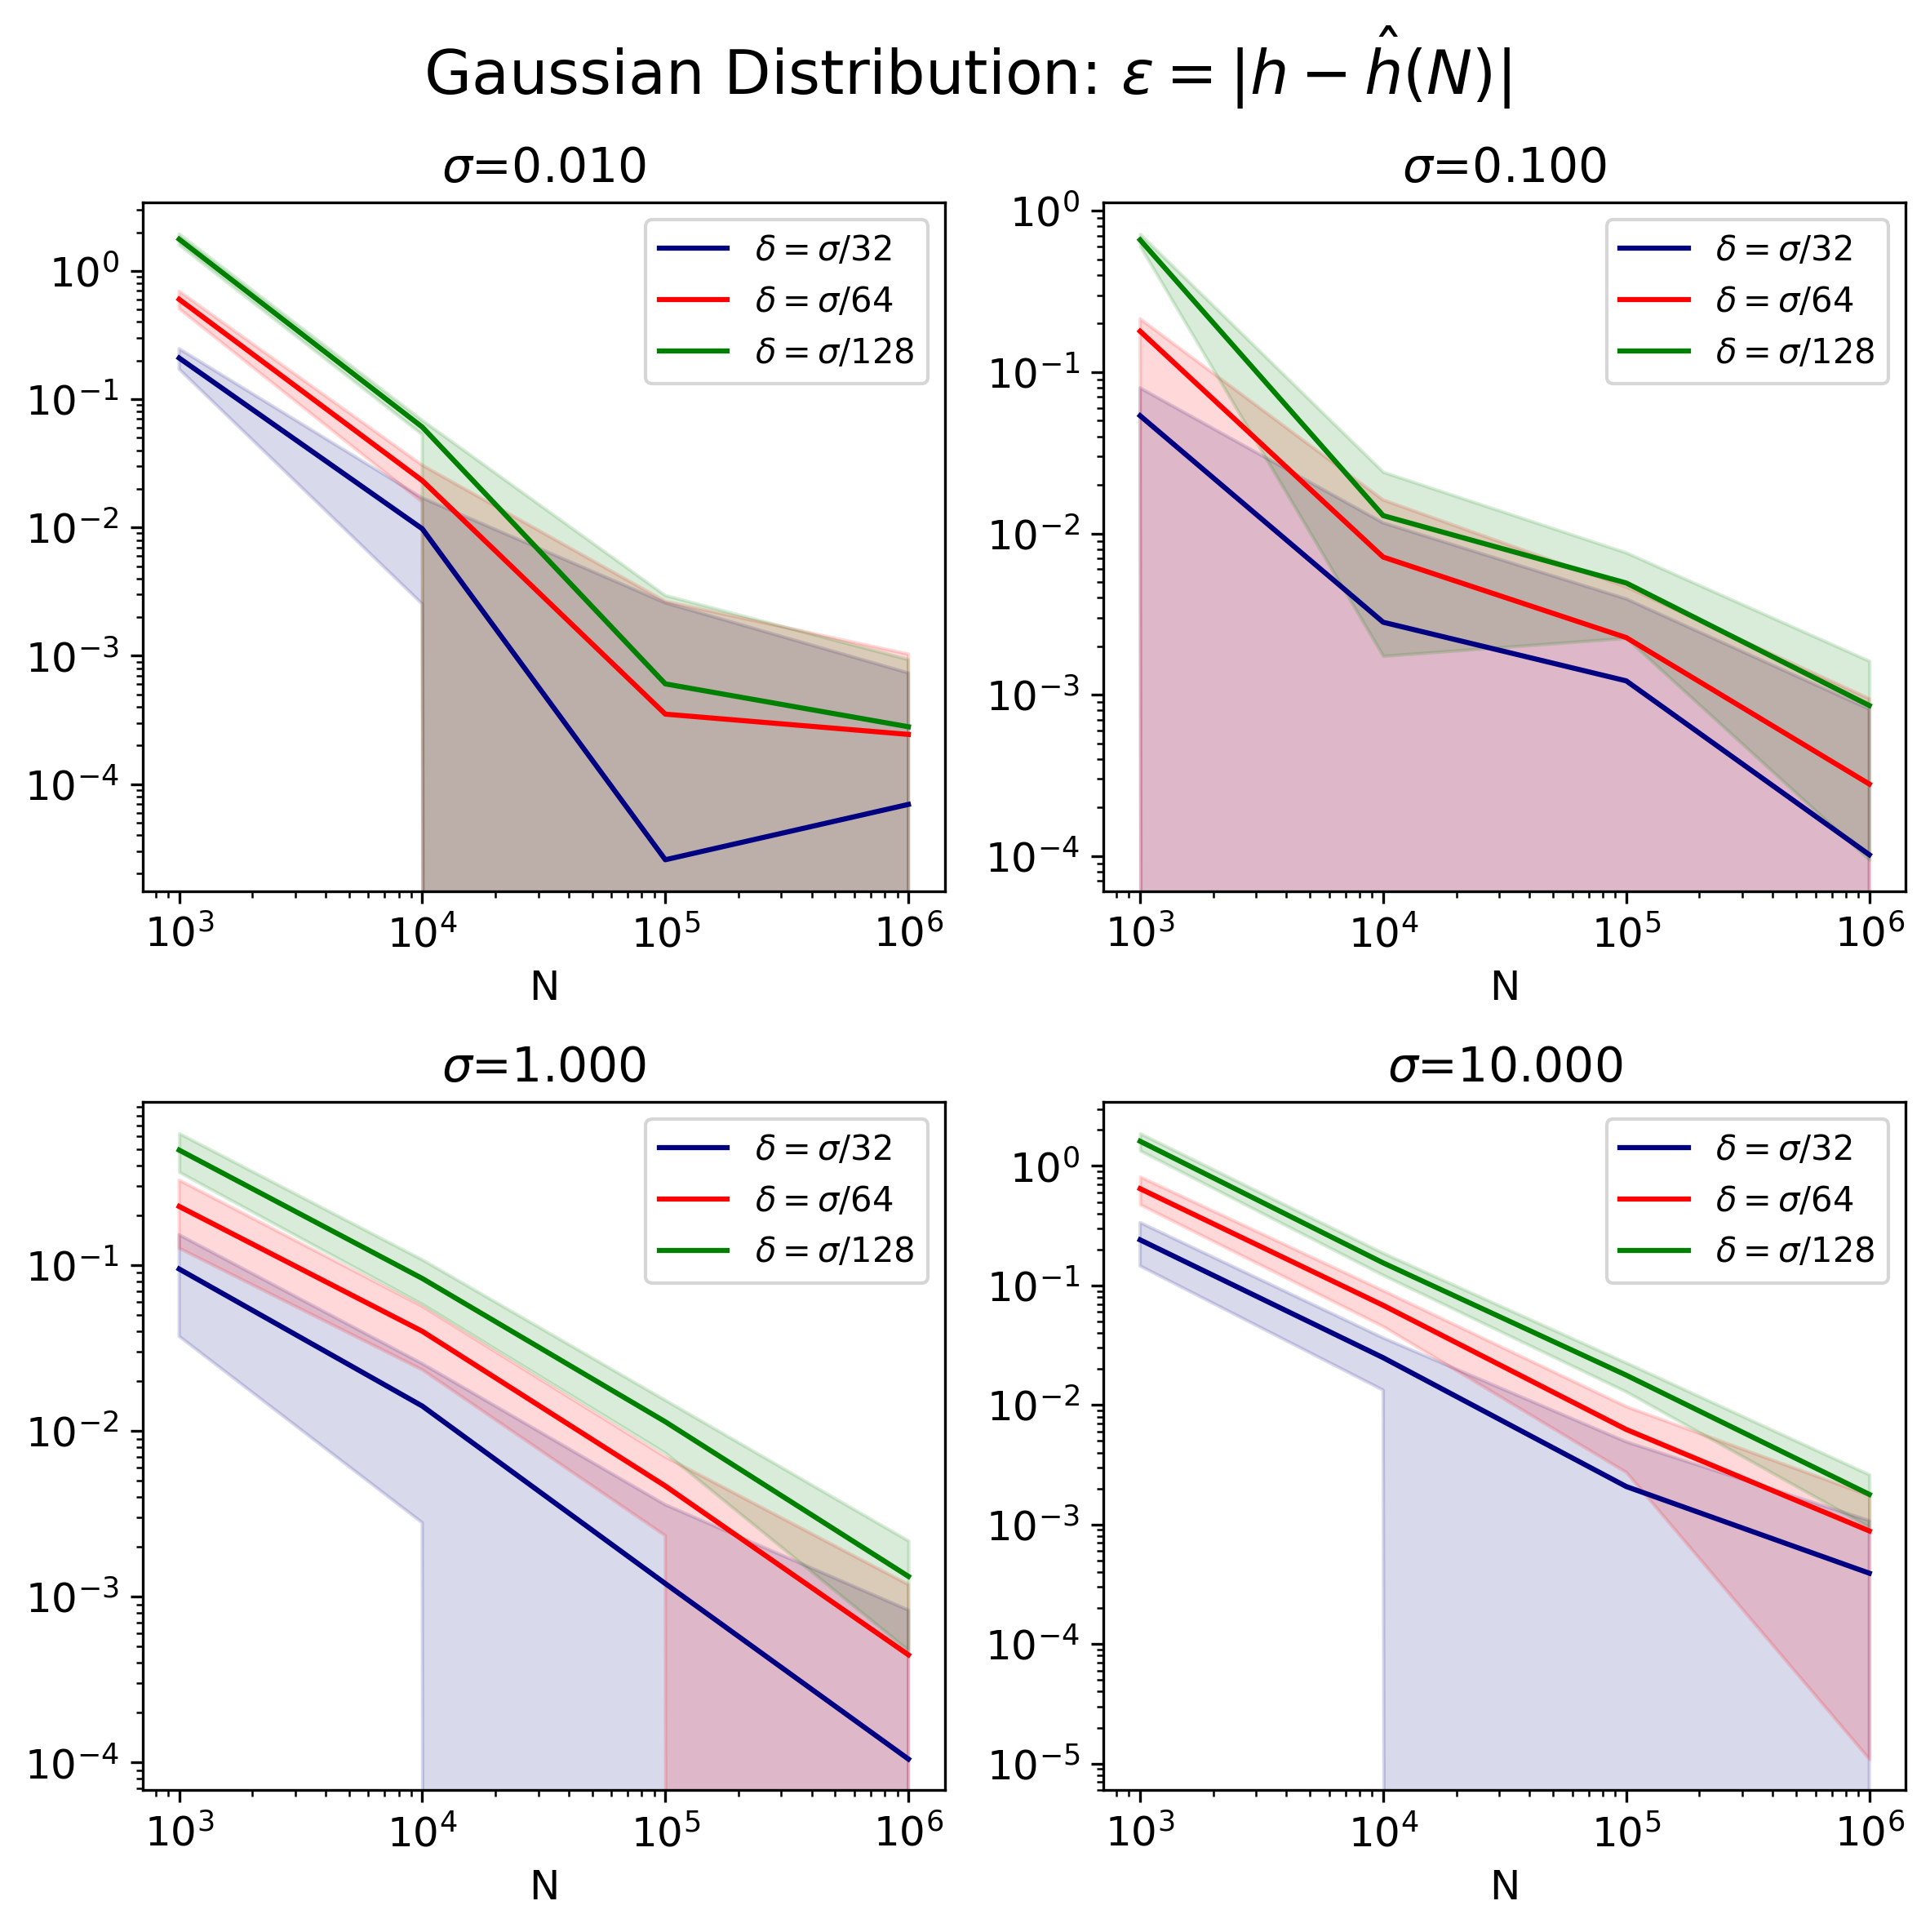

In [7]:
sigma_range=np.array([0.01, 0.1, 1, 10])
N_range=np.array([10**x for x in range(3,7)])

fig, ax= plt.subplots(2,2)
divisor_range=np.array([2**i for i in range(5,8)])

color=["navy", "r", "g"]
color_index=0

for divisor in divisor_range:
   h=[]

   for n in range(100):
      h_data=[]
      for sigma in sigma_range:
         delta=sigma/divisor
         h_emp=[]
         for N in N_range:
            density, bins= pdf(np.random.normal(loc=0, scale=sigma,size=N), delta=delta)
            h_emp.append(differential_entropy_nats(density, bins))  
         h_data.append(h_emp)
      h.append(h_data)

   h_mean=np.mean(h, axis=0)
   h_sigma=np.sqrt(np.var(h, axis=0))


   fig.set_dpi(300)
   fig.suptitle("Gaussian Distribution: $\epsilon=|h-\hat{h}(N)|$", fontsize=18)
   fig.set_size_inches(8,8)
   x=[0,0,1,1]
   y=[0,1,0,1]
   for i, sigma in enumerate(sigma_range):
      h_teo=theo_diff_entropy_nats(sigma, type="gaussian")
      a=np.abs((h_teo-h_mean[i]))
      ax[x[i]][y[i]].plot(N_range, a, label="$\delta= \sigma/%d$" % divisor, c=color[color_index])
      ax[x[i]][y[i]].fill_between(N_range,a+h_sigma[i],a-h_sigma[i], color=color[color_index],alpha=0.15)
      
      ax[x[i]][y[i]].set_xscale("log")
      ax[x[i]][y[i]].set_yscale("log")
      ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
      ax[x[i]][y[i]].set_title("$\sigma$=%.3f" % sigma, fontsize=14)
      ax[x[i]][y[i]].tick_params(labelsize=12)
      ax[x[i]][y[i]].legend()
   color_index+=1
fig.set_tight_layout(True)
plt.show()


Uniform Distribution

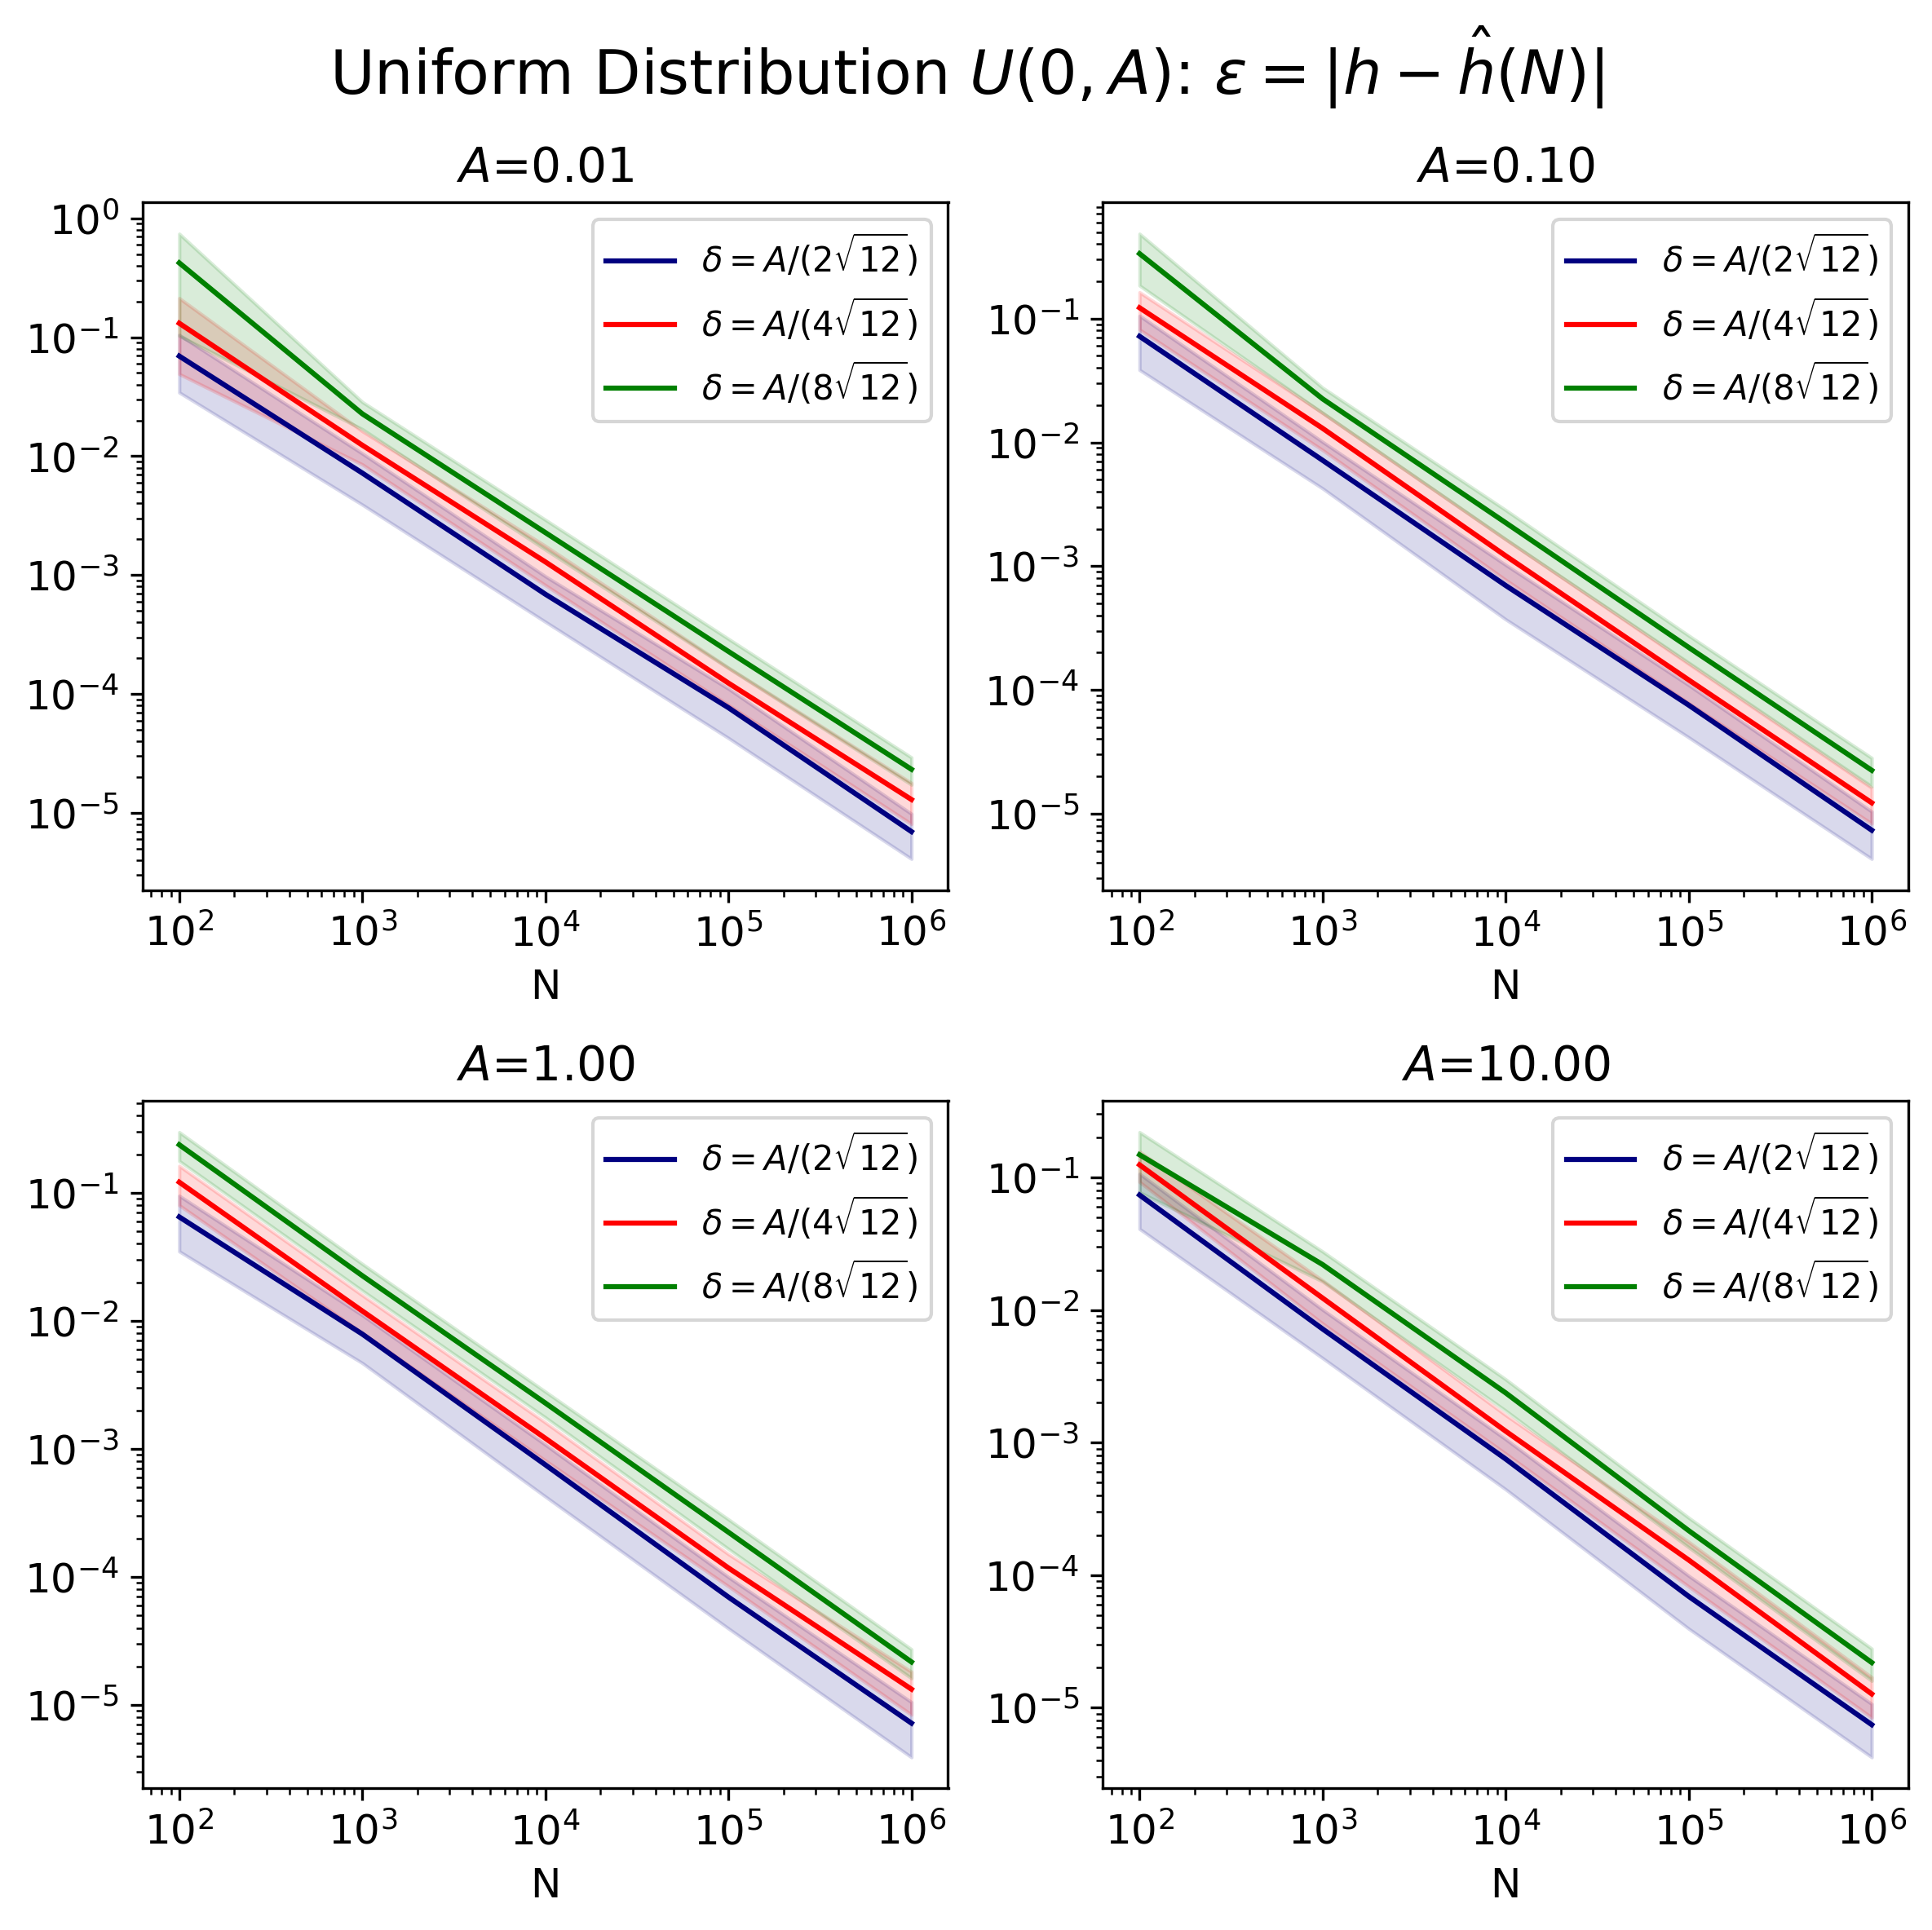

In [5]:
A_range=np.array([0.01, 0.1, 1.0, 10])
N_range=np.array([10**x for x in range(2,7)])

fig, ax= plt.subplots(2,2)
divisor_range=np.array([2**i for i in range(1,4)])

color=["navy", "r", "g"]
color_index=0

for divisor in divisor_range:
   h=[]

   for n in range(100):
      h_data=[]
      for A in A_range:
         delta=A/(divisor*np.sqrt(12))
         h_emp=[]
         for N in N_range:
            density, bins= pdf(np.random.uniform(low=0, high=A, size=N), delta=delta)
            h_emp.append(differential_entropy(density, bins))  
         h_data.append(h_emp)
      h.append(h_data)

   h_mean=np.mean(h, axis=0)
   h_sigma=np.sqrt(np.var(h, axis=0))


   fig.set_dpi(300)
   fig.suptitle("Uniform Distribution $U(0,A)$: $\epsilon=|h-\hat{h}(N)|$", fontsize=18)
   fig.set_size_inches(8,8)
   x=[0,0,1,1]
   y=[0,1,0,1]
   for i, A in enumerate(A_range):
      h_teo=theo_diff_entropy(A, type="uniform")
      a=np.abs(h_teo-h_mean[i])
      ax[x[i]][y[i]].plot(N_range, a, label="$\delta= A/(%d \sqrt{12})$" % divisor, c=color[color_index])
      ax[x[i]][y[i]].fill_between(N_range,a+h_sigma[i],a-h_sigma[i], color=color[color_index],alpha=0.15)
      #ax[x[i]][y[i]].axhline(y=np.sqrt(1/(2*np.pi*np.e)*np.exp(2*h_teo_nats))/np.abs(h_teo))
      
      ax[x[i]][y[i]].set_xscale("log")
      ax[x[i]][y[i]].set_yscale("log")
      ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
      ax[x[i]][y[i]].set_title("$A$=%.2f" % A, fontsize=14)
      ax[x[i]][y[i]].tick_params(labelsize=12)
      ax[x[i]][y[i]].legend()
   color_index+=1
fig.set_tight_layout(True)
plt.show()


Exponential Distribution

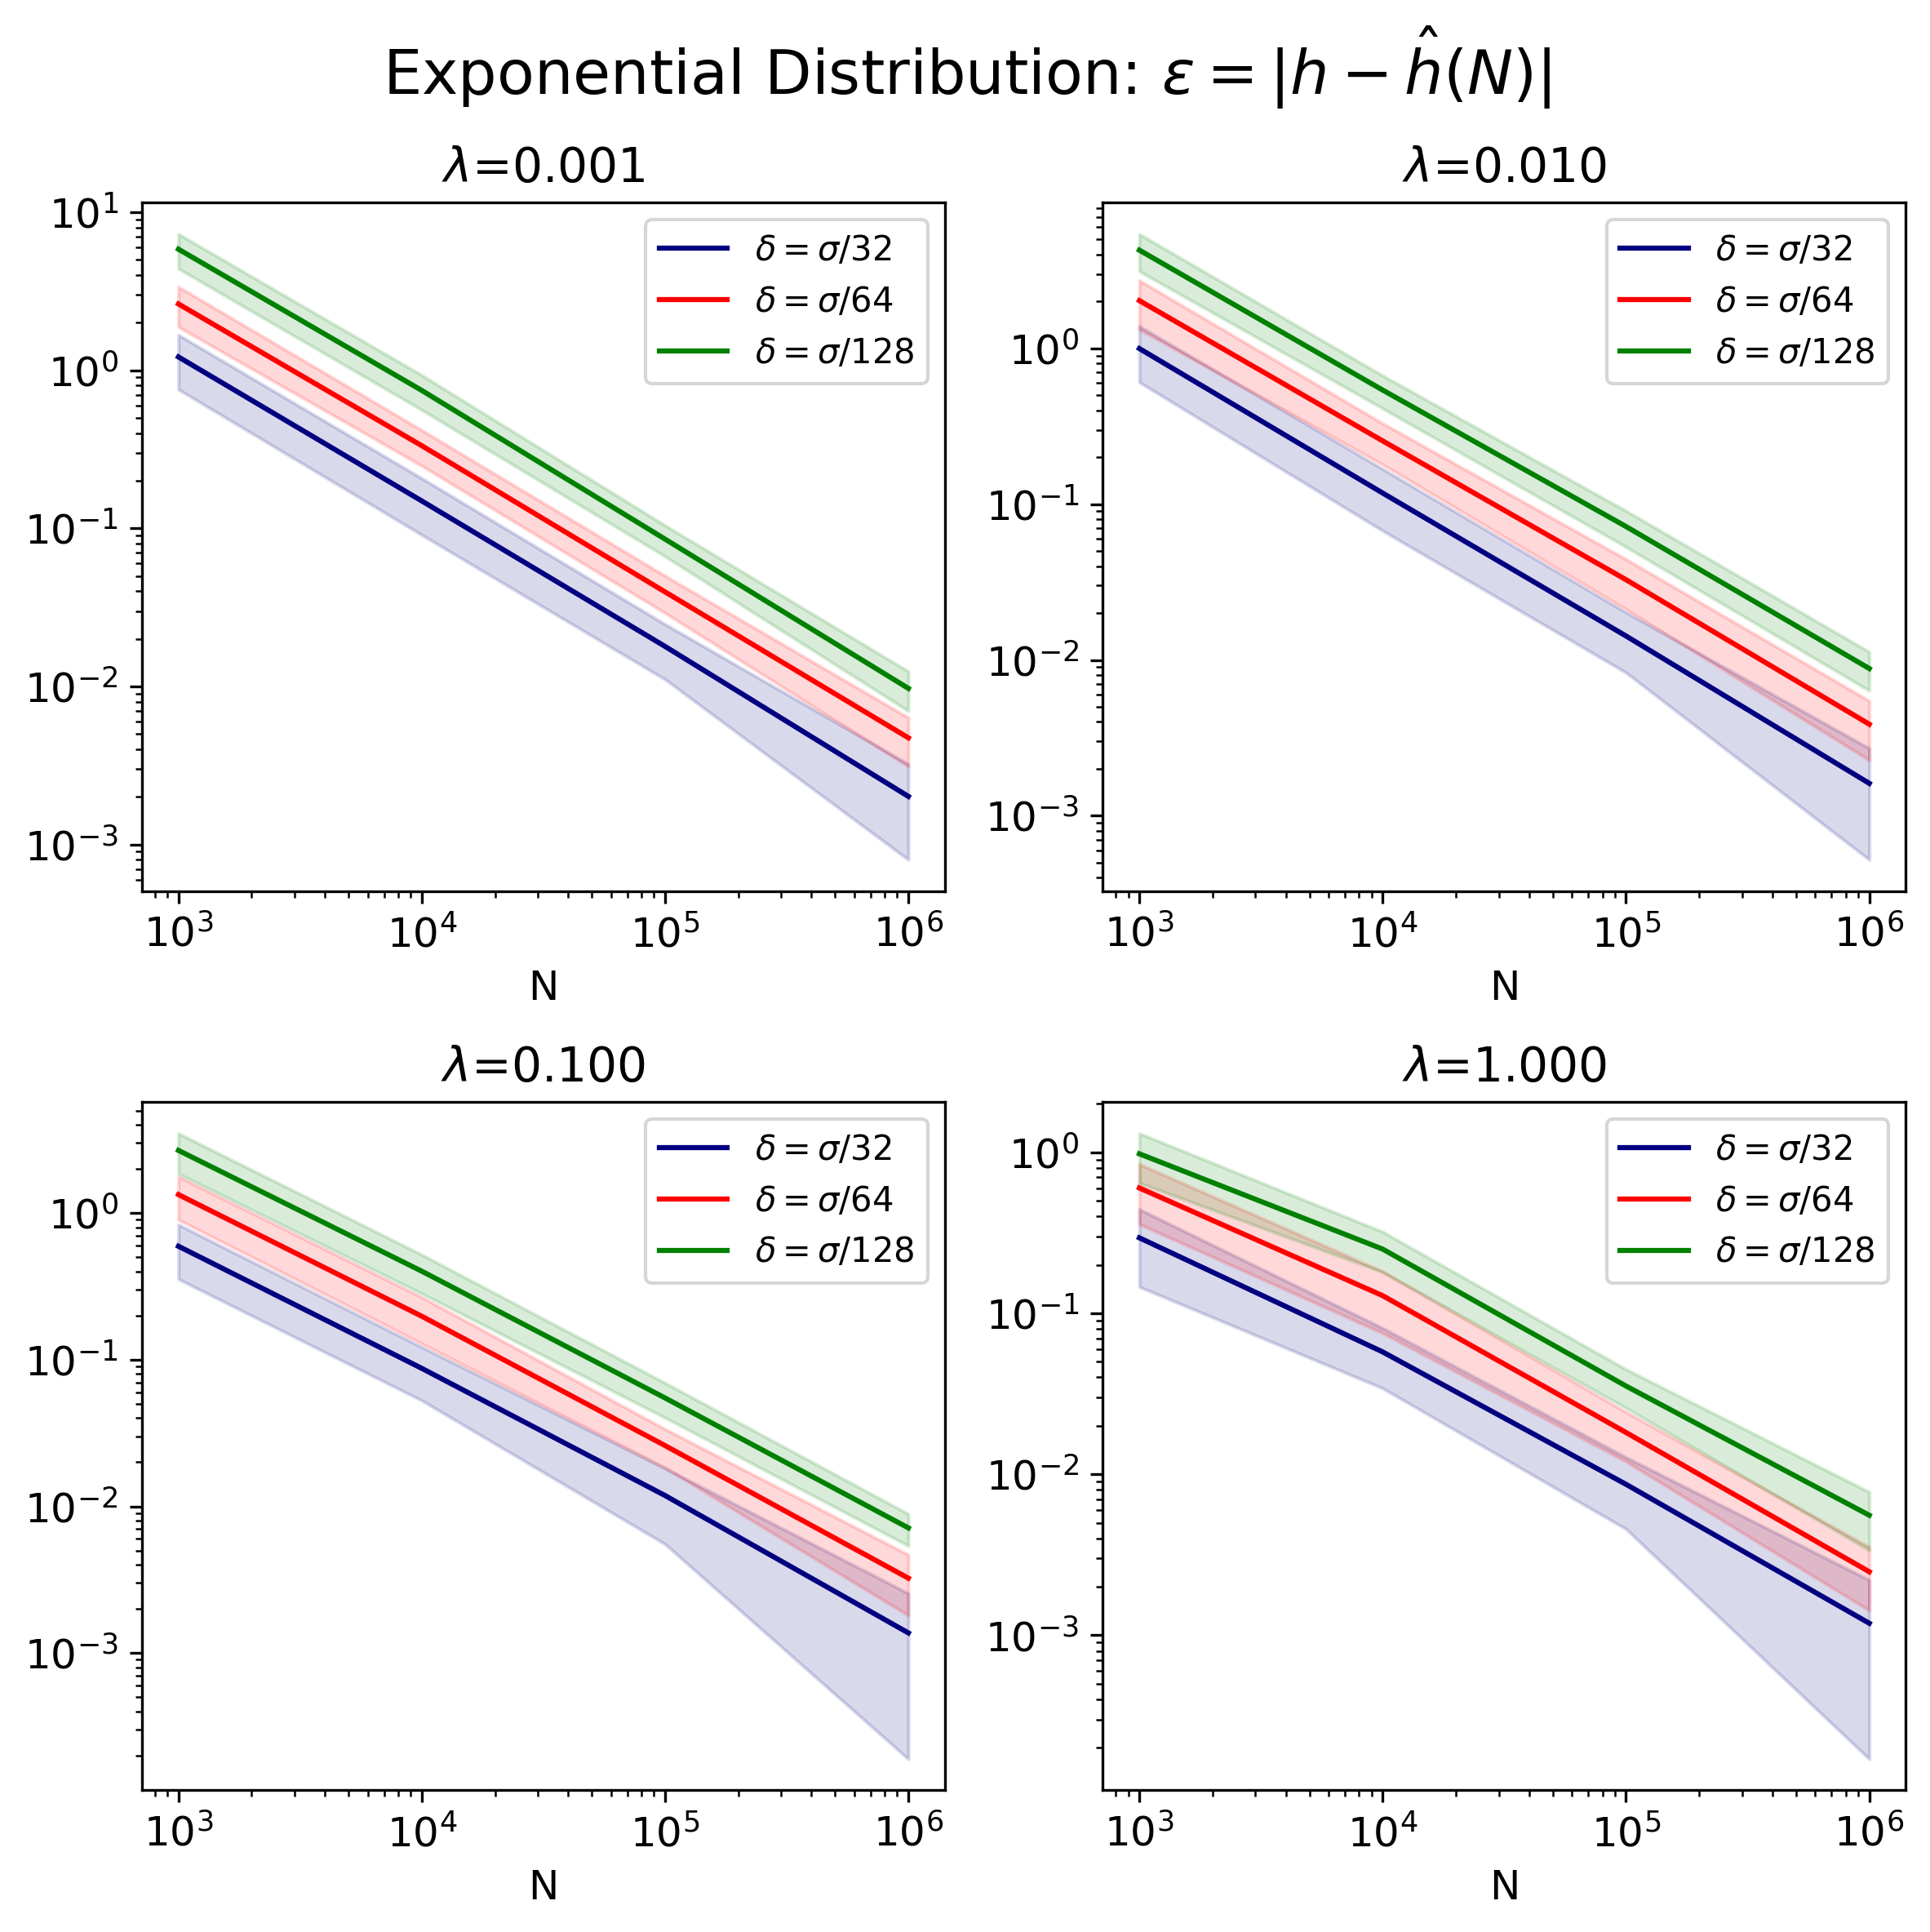

In [97]:
lambda_range=np.array([0.001, 0.01, 0.1, 1])
N_range=np.array([10**x for x in range(3,7)])

fig, ax= plt.subplots(2,2)
divisor_range=np.array([2**i for i in range(5,8)])

color=["navy", "r", "g"]
color_index=0

for divisor in divisor_range:
   h=[]

   for n in range(100):
      h_data=[]
      for l in lambda_range:
         delta=1/(divisor*l)
         h_emp=[]
         for N in N_range:
            density, bins= pdf(np.random.exponential(scale=1/l,size=N), delta=delta)
            h_emp.append(differential_entropy_nats(density, bins))  
         h_data.append(h_emp)
      h.append(h_data)

   h_mean=np.mean(h, axis=0)
   h_sigma=np.sqrt(np.var(h, axis=0))


   fig.set_dpi(300)
   fig.suptitle("Exponential Distribution: $\epsilon=|h-\hat{h}(N)|$", fontsize=18)
   fig.set_size_inches(8,8)
   x=[0,0,1,1]
   y=[0,1,0,1]
   for i, l in enumerate(lambda_range):
      h_teo=theo_diff_entropy_nats(l, type="exponential")
      a=np.abs(h_teo-h_mean[i])
      ax[x[i]][y[i]].plot(N_range, a, label="$\delta= \sigma/%d$" % divisor, c=color[color_index])
      ax[x[i]][y[i]].fill_between(N_range,a+h_sigma[i],a-h_sigma[i], color=color[color_index],alpha=0.15)
      #ax[x[i]][y[i]].axhline(y=np.sqrt(1/(2*np.pi*np.e)*np.exp(2*h_teo_nats))/np.abs(h_teo))
      
      ax[x[i]][y[i]].set_xscale("log")
      ax[x[i]][y[i]].set_yscale("log")
      ax[x[i]][y[i]].set_xlabel("N", fontsize=12)
      ax[x[i]][y[i]].set_title("$\lambda$=%.3f" % l, fontsize=14)
      ax[x[i]][y[i]].tick_params(labelsize=12)
      ax[x[i]][y[i]].legend()
   color_index+=1
fig.set_tight_layout(True)
plt.show()


### Ex3: Joint differential entropy estimate for two continuous random variables

In [188]:
def joint_pdf(x_seq, y_seq, delta_x, delta_y):
    nbinx=int(np.ceil((np.max(x_seq)-np.min(x_seq))/delta_x))
    nbiny=int(np.ceil((np.max(y_seq)-np.min(y_seq))/delta_y))
    joint, xedges, yedges= np.histogram2d(x=x_seq, y=y_seq, bins=(nbinx, nbiny), density=True)
    pdf_x, _= np.histogram(x_seq, bins=xedges, density=True)
    pdf_y, _= np.histogram(y_seq, bins=yedges, density=True)

    d_x=np.diff(xedges)[0] #we kept d_x the same for all bins!
    d_y=np.diff(yedges)[0] #we kept d_y the same for all bins!
    return {"xedges": xedges, "yedges": yedges, "joint": joint, "pdf_x": pdf_x, "pdf_y": pdf_y,
            "d_x": d_x, "d_y": d_y}

In the fellowing cell we will set to zero the information:
$i_{x,y}=-log_2(P_\delta(x,y))$ where $P_\delta(x,y)=0$. From a theoretical point of view this is extremely wrong. But, we are interested in the differential entropy so we are actually doing this because later we'll use $lim_{x->0} x ln(x)=0$.

In [189]:
def i(density):
    info=[]
    for j in range(len(density)):
        if density[j]==0:
            info.append(0)
        else:
            info.append(-np.log(density[j]))

    return np.array(info)

def differential_joint_entropy(pdfs):
    
    i_x=i(pdfs["pdf_x"])
    h_x= np.dot(pdfs["pdf_x"]*pdfs["d_x"], i_x)
    i_y=i(pdfs["pdf_y"])
    h_y= np.dot(pdfs["pdf_y"]*pdfs["d_y"], i_y)
    i_joint=i(pdfs["joint"].flatten())
    h_joint=np.dot(pdfs["joint"].flatten()*pdfs["d_x"]*pdfs["d_y"], i_joint)

    return {"h_x": h_x, "h_y": h_y,"h_x,y": h_joint,  "h_x|y": (h_joint-h_y),
            "h_y|x": (h_joint-h_x), "I_x;y": (h_x+h_y-h_joint)}

In [190]:
#For KL divergence we need the same domain:
def KL_px_py(pdfs, seq_y):
    pdf_y, _= np.histogram(seq_y, bins=pdfs["xedges"], density=False)
    pdf_y=pdf_y/len(seq_y)/pdfs["d_x"] #normalization
    mask=pdfs["pdf_x"]!=0
    pdf_ratio=np.empty_like(pdfs["pdf_x"])
    pdf_ratio[mask]= pdf_y[mask]/pdfs["pdf_x"][mask]
    pdf_ratio[~mask]=0
    return np.dot(pdfs["pdf_x"]*pdfs["d_x"], i(pdf_ratio))

### Ex4: Testing results of Ex3

In [246]:
#theoretical results:
def theoretical_values(params, case):
    if case==1:
        A=params
        hx= np.log(A-1)
        hy= (1+2*np.log(A-1))/(A-1)+(A-3)/(A-1)*np.log(A-1)
        hxy= np.log(2) + hx
        hy_given_x= np.log(2)
        hx_given_y=hxy-hy
        Ixy=hy-np.log(2)
        KLxy =2*(1-np.log(2))/(A-1)
        
    if case==2: 
        s2_x, s2_z, mu_x, mu_z , a, b= params
        mu_y=a*mu_x+b*mu_z
        s2_y= a**2*s2_x+b**2*s2_z
        hx= 0.5*np.log(2*np.pi*np.e*s2_x)
        hy= 0.5*np.log(2*np.pi*np.e*s2_y)
        detK= s2_x*s2_y-a**2*s2_x**2 
        hxy=0.5*np.log((2*np.pi*np.e)**2*detK)
        hx_given_y=hxy-hy
        hy_given_x=hxy-hx
        Ixy=hx+hy-hxy 
        KLxy=0.5*np.log(s2_y/s2_x)+(s2_x+(mu_x-mu_y)**2)/(2*s2_y)-0.5
    return {"hx": hx, "hy": hy, "h_x,y": hxy, 
                "h_x|y": hx_given_y, "h_y|x": hy_given_x, "mutual": Ixy, "KL": KLxy}

Case 1: $    x \sim p_x(x)=\mathcal{U}(1,A) \qquad z \sim p_z(z)=\mathcal{U}(-1,1) \qquad y=x+z$

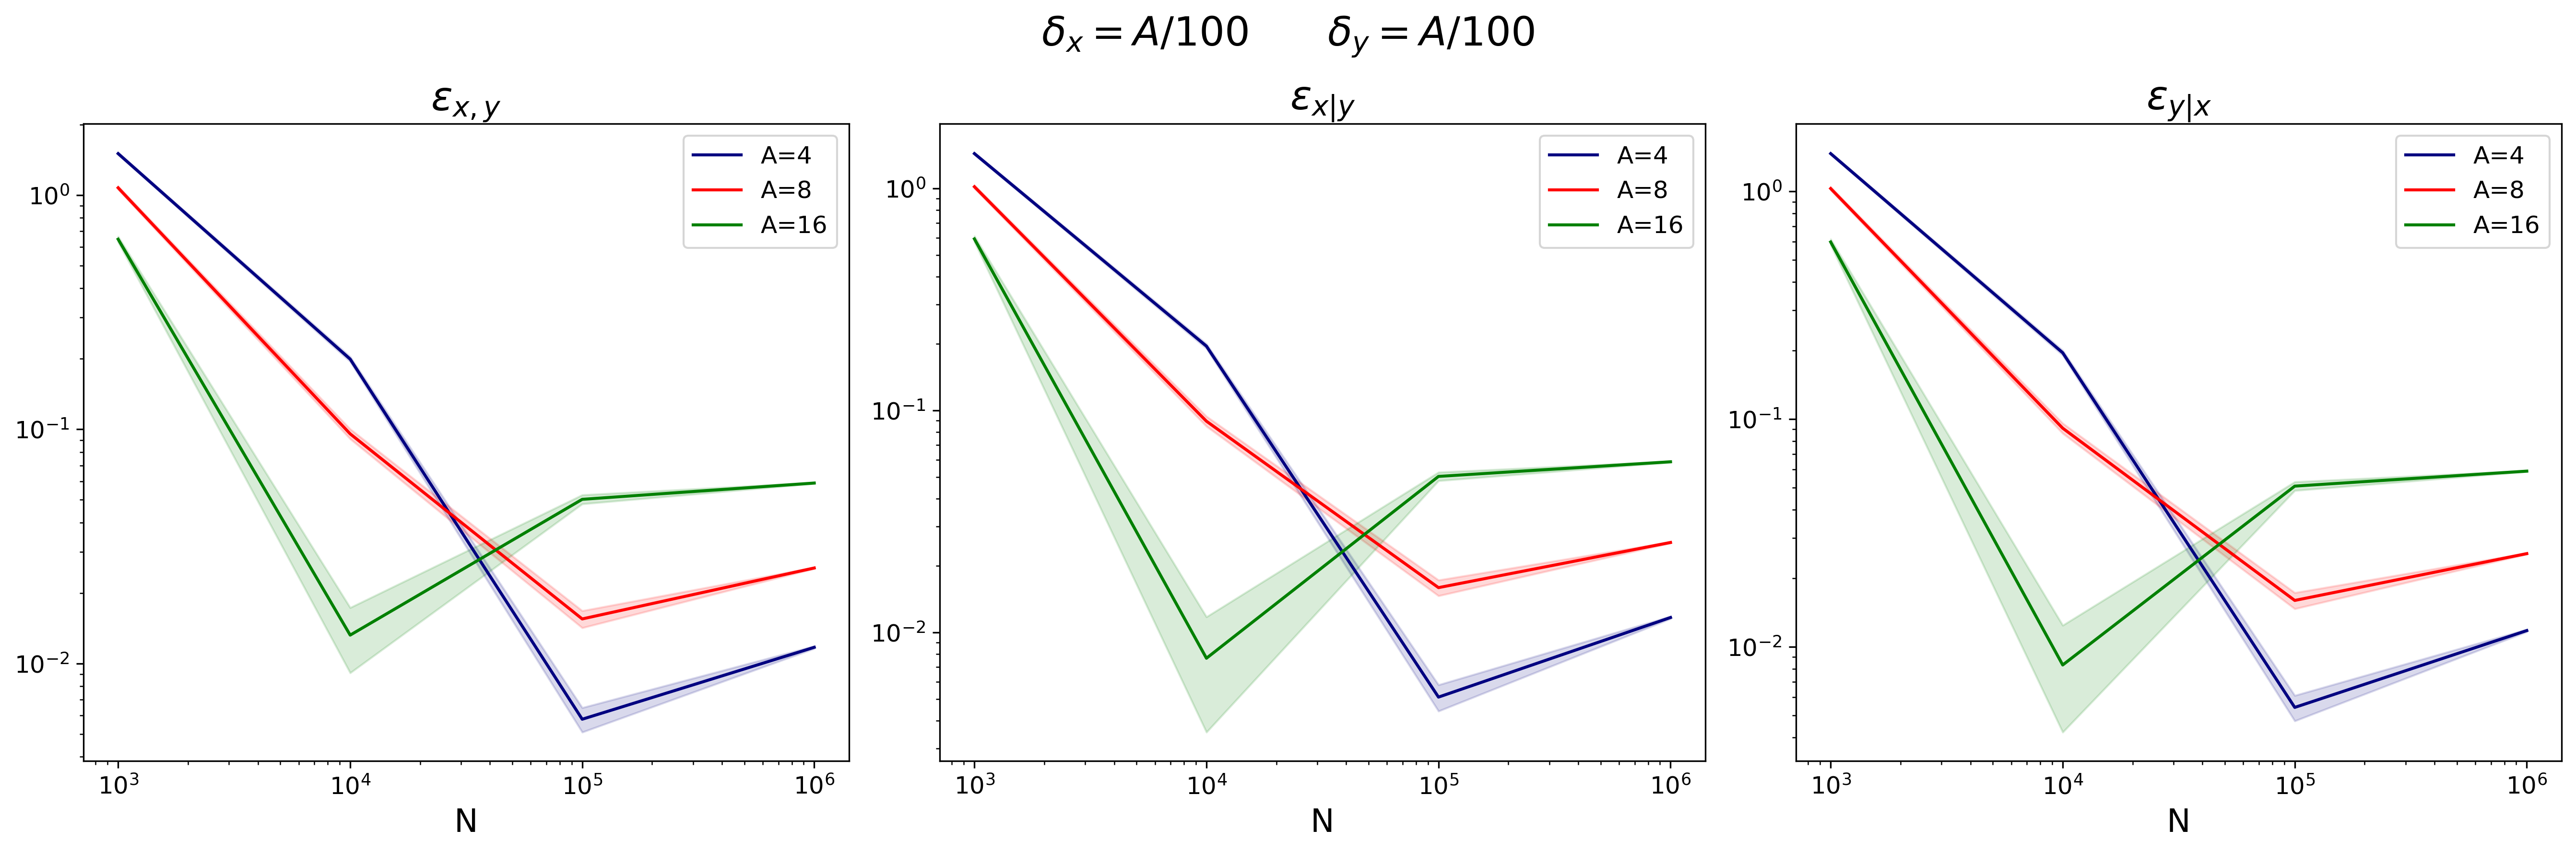

In [170]:
A_range=np.array([4, 8, 16])
N_range=np.array([10**x for x in range(3,7)])
joint=[]
x_given_y=[]
y_given_x=[]
mutual=[]
KL=[]

for n in range(50):
    joint_data=[]
    x_given_y_data=[]
    y_given_x_data=[]
    mutual_data=[]
    KL_data=[]
    for N in N_range:
        joint_emp=[]
        x_given_y_emp=[]
        y_given_x_emp=[]
        mutual_emp=[]
        KL_emp=[]
        for A in A_range:
            x=np.random.uniform(low=1, high=A, size=N)
            z=np.random.uniform(low=-1, high=1, size=N)
            y=x+z
            dx=A/100
            dy=A/100
            dic=joint_pdf(x,y,delta_x=dx, delta_y=dy)
            H=differential_joint_entropy(dic)
            joint_emp.append(H['h_x,y'])
            x_given_y_emp.append(H['h_x|y'])
            y_given_x_emp.append(H['h_y|x'])
            mutual_emp.append(H['I_x;y'])
            KL_emp.append( KL_px_py(dic, y))
        joint_data.append(joint_emp)
        x_given_y_data.append(x_given_y_emp)
        y_given_x_data.append(y_given_x_emp)
        mutual_data.append(mutual_emp)
        KL_data.append(KL_emp)
            
    joint.append(np.array(joint_data).T)
    x_given_y.append(np.array(x_given_y_data).T)
    y_given_x.append(np.array(y_given_x_data).T)
    mutual.append(np.array(mutual_data).T)
    KL.append(np.array(KL_data).T)

joint_mean=np.mean(joint, axis=0)
joint_sigma=np.sqrt(np.var(joint, axis=0))
x_given_y_mean=np.mean(x_given_y, axis=0)
x_given_y_sigma=np.sqrt(np.var(x_given_y, axis=0))
y_given_x_mean=np.mean(y_given_x, axis=0)
y_given_x_sigma=np.sqrt(np.var(y_given_x, axis=0))
mutual_mean=np.mean(mutual, axis=0)
mutual_sigma=np.sqrt(np.var(mutual, axis=0))
KL_mean=np.mean(KL, axis=0)
KL_sigma=np.sqrt(np.var(KL, axis=0))



fig, ax= plt.subplots(1,3)
fig.set_dpi(300)
fig.set_size_inches(18,6)
fig.suptitle("$\delta_x= A/100 \qquad \delta_y= A/100$", fontsize=20)

colors=['navy', 'r', 'g']
for k,A in enumerate(A_range):

    theo_values=theoretical_values(A, case=1)


    ax[0].set_title("$\epsilon_{x,y}$", fontsize=20)
    a=np.abs(joint_mean[k]-theo_values["h_x,y"])
    ax[0].plot(N_range, a, c=colors[k], label="A=%d" % A)
    ax[0].fill_between(N_range, a+joint_sigma[k],a-joint_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{x|y}$", fontsize=20)
    a=np.abs(x_given_y_mean[k]-theo_values["h_x|y"])
    ax[1].plot(N_range, a, c=colors[k], label="A=%d" % A)
    ax[1].fill_between(N_range, a+joint_sigma[k],a-joint_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    ax[2].set_title("$\epsilon_{y|x}$", fontsize=20)
    a=np.abs(y_given_x_mean[k]-theo_values["h_y|x"])
    ax[2].plot(N_range, a , c=colors[k], label="A=%d" % A)
    ax[2].fill_between(N_range, a+joint_sigma[k],a-joint_sigma[k],
                         color=colors[k],alpha=0.15)

    ax[2].set_xscale("log")
    ax[2].set_yscale("log")
    ax[2].set_xlabel("N", fontsize=16)
    ax[2].tick_params(labelsize=12)

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()


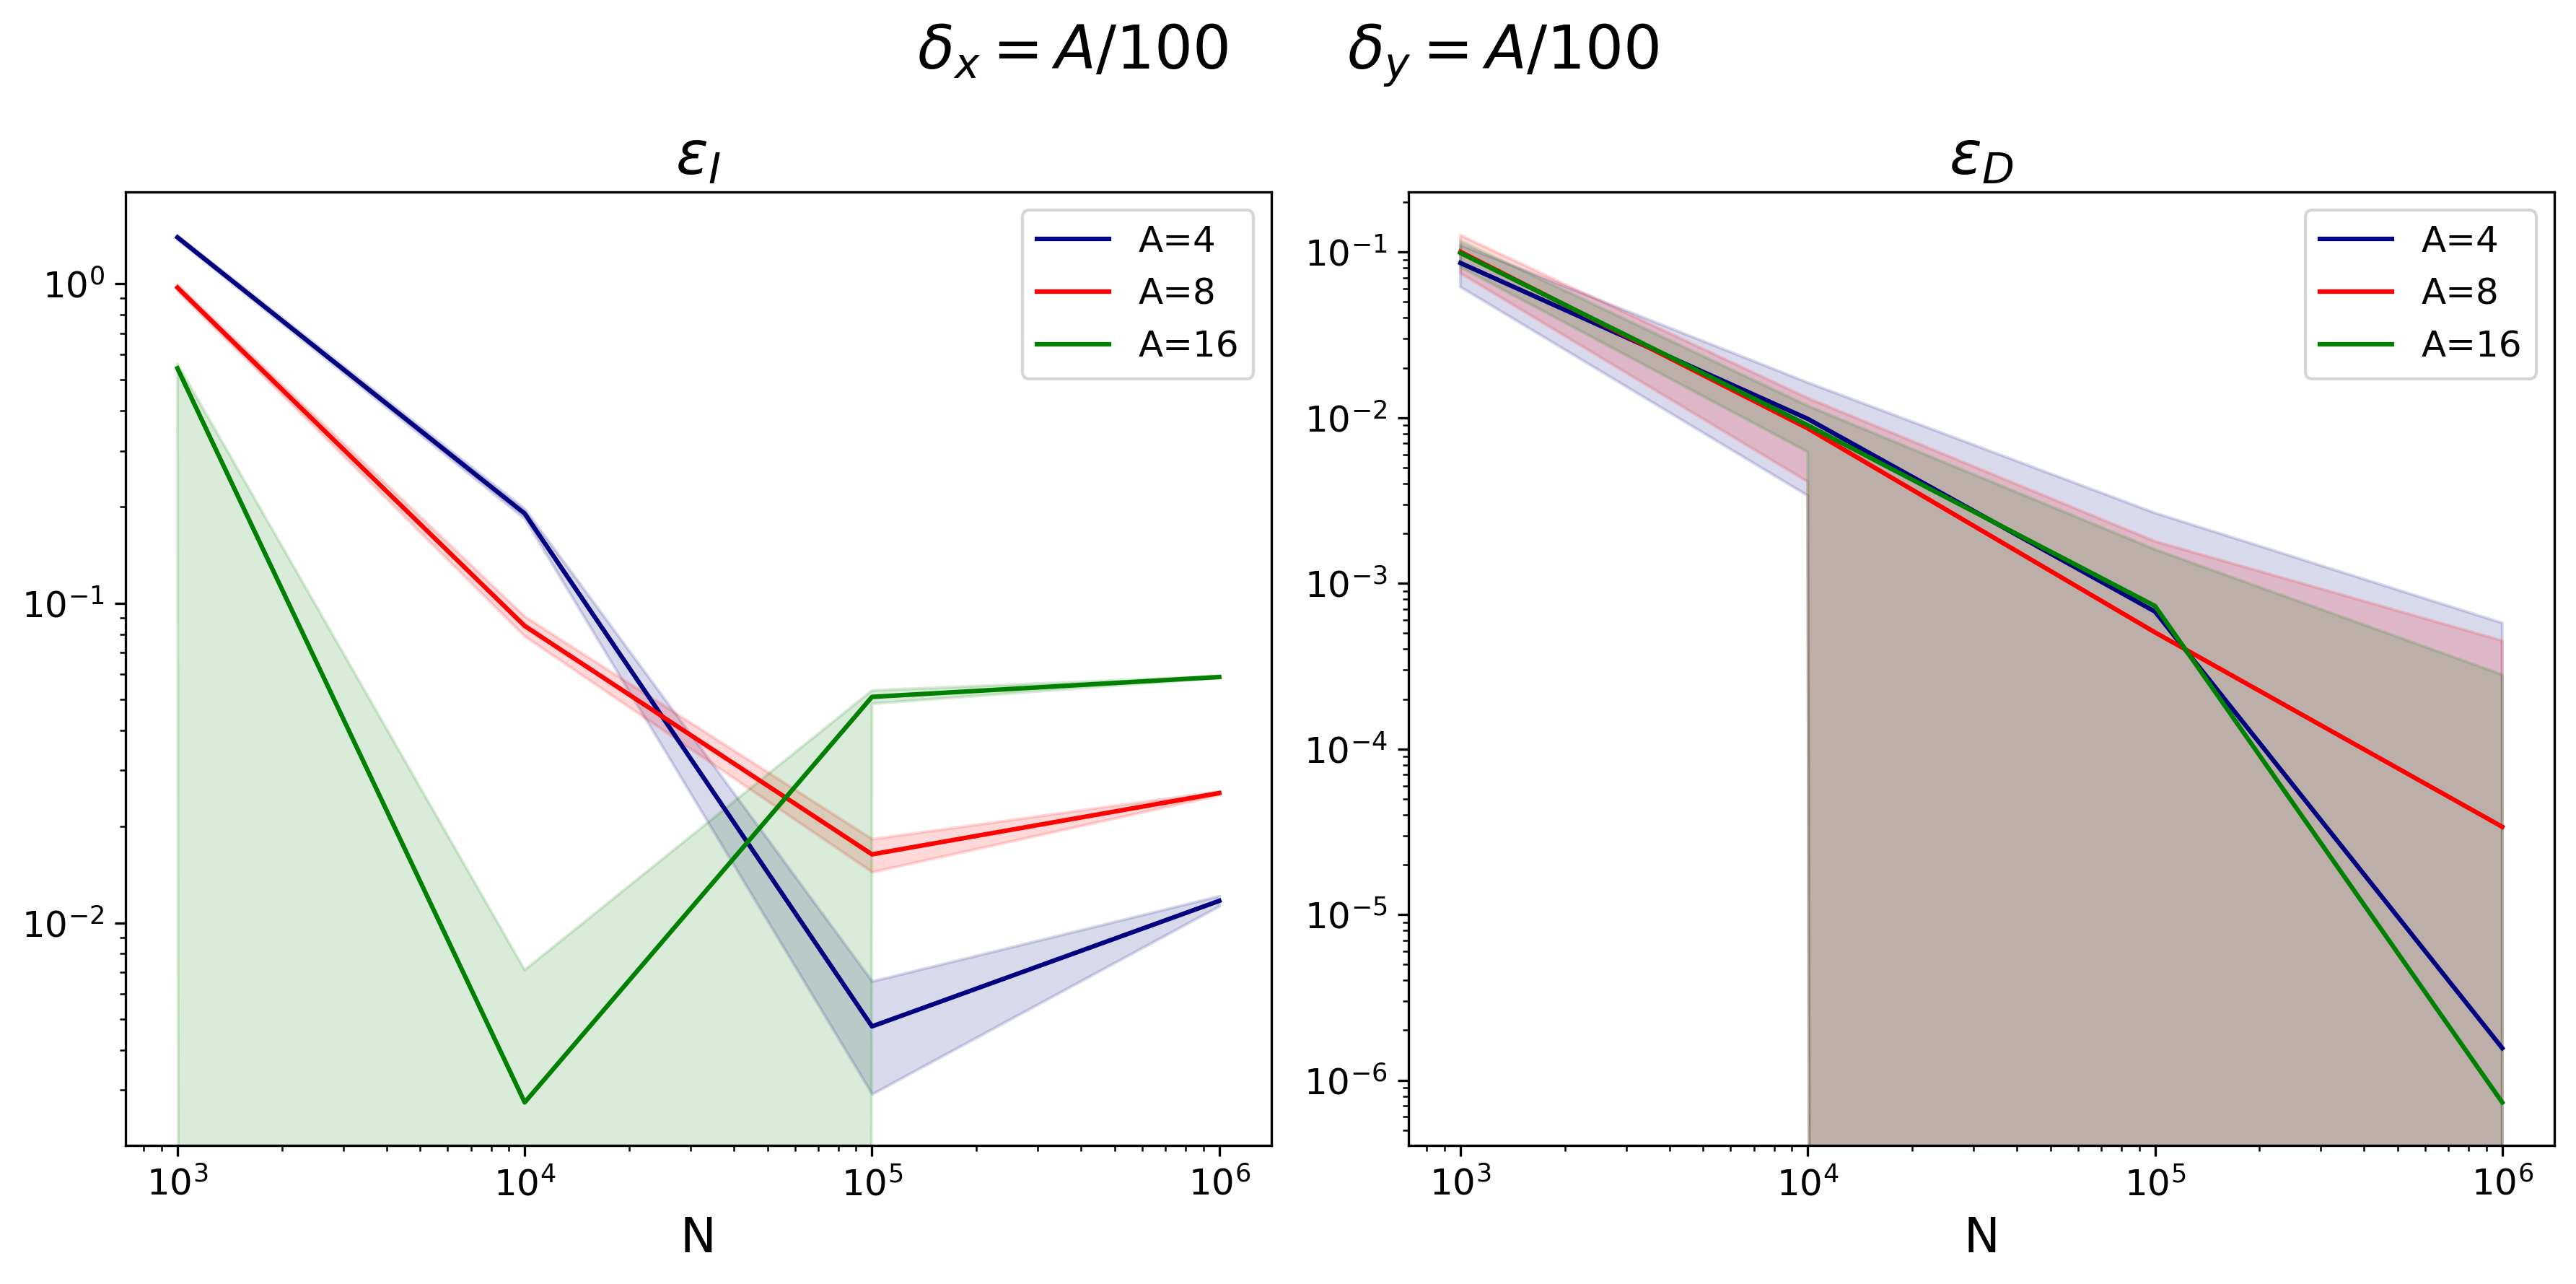

In [171]:
fig, ax= plt.subplots(1,2)
fig.set_dpi(300)
fig.set_size_inches(12,6)
fig.suptitle("$\delta_x= A/100 \qquad \delta_y= A/100$", fontsize=20)

colors=['navy', 'red', 'green']

for k,A in enumerate(A_range):
    theo_values=theoretical_values(A, case=1)

    ax[0].set_title("$\epsilon_{I}$", fontsize=20)
    a=np.abs(mutual_mean[k]-theo_values["mutual"])
    ax[0].plot(N_range, a, c=colors[k], label="A=%d" % A)
    ax[0].fill_between(N_range, a+mutual_sigma[k],a-mutual_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{D}$", fontsize=20)
    a= np.abs(KL_mean[k]-theo_values["KL"])
    ax[1].plot(N_range,a, c=colors[k], label="A=%d" % A)
    ax[1].fill_between(N_range, a+KL_sigma[k],a-KL_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()


Case 2:  $x \sim p_x(x)=\mathcal{N}(\mu_x=1,\sigma^2_x) \qquad z \sim p_z(z)=\mathcal{N}(\mu_z=0,\sigma^2_z=0.01) \qquad y=ax+bz$

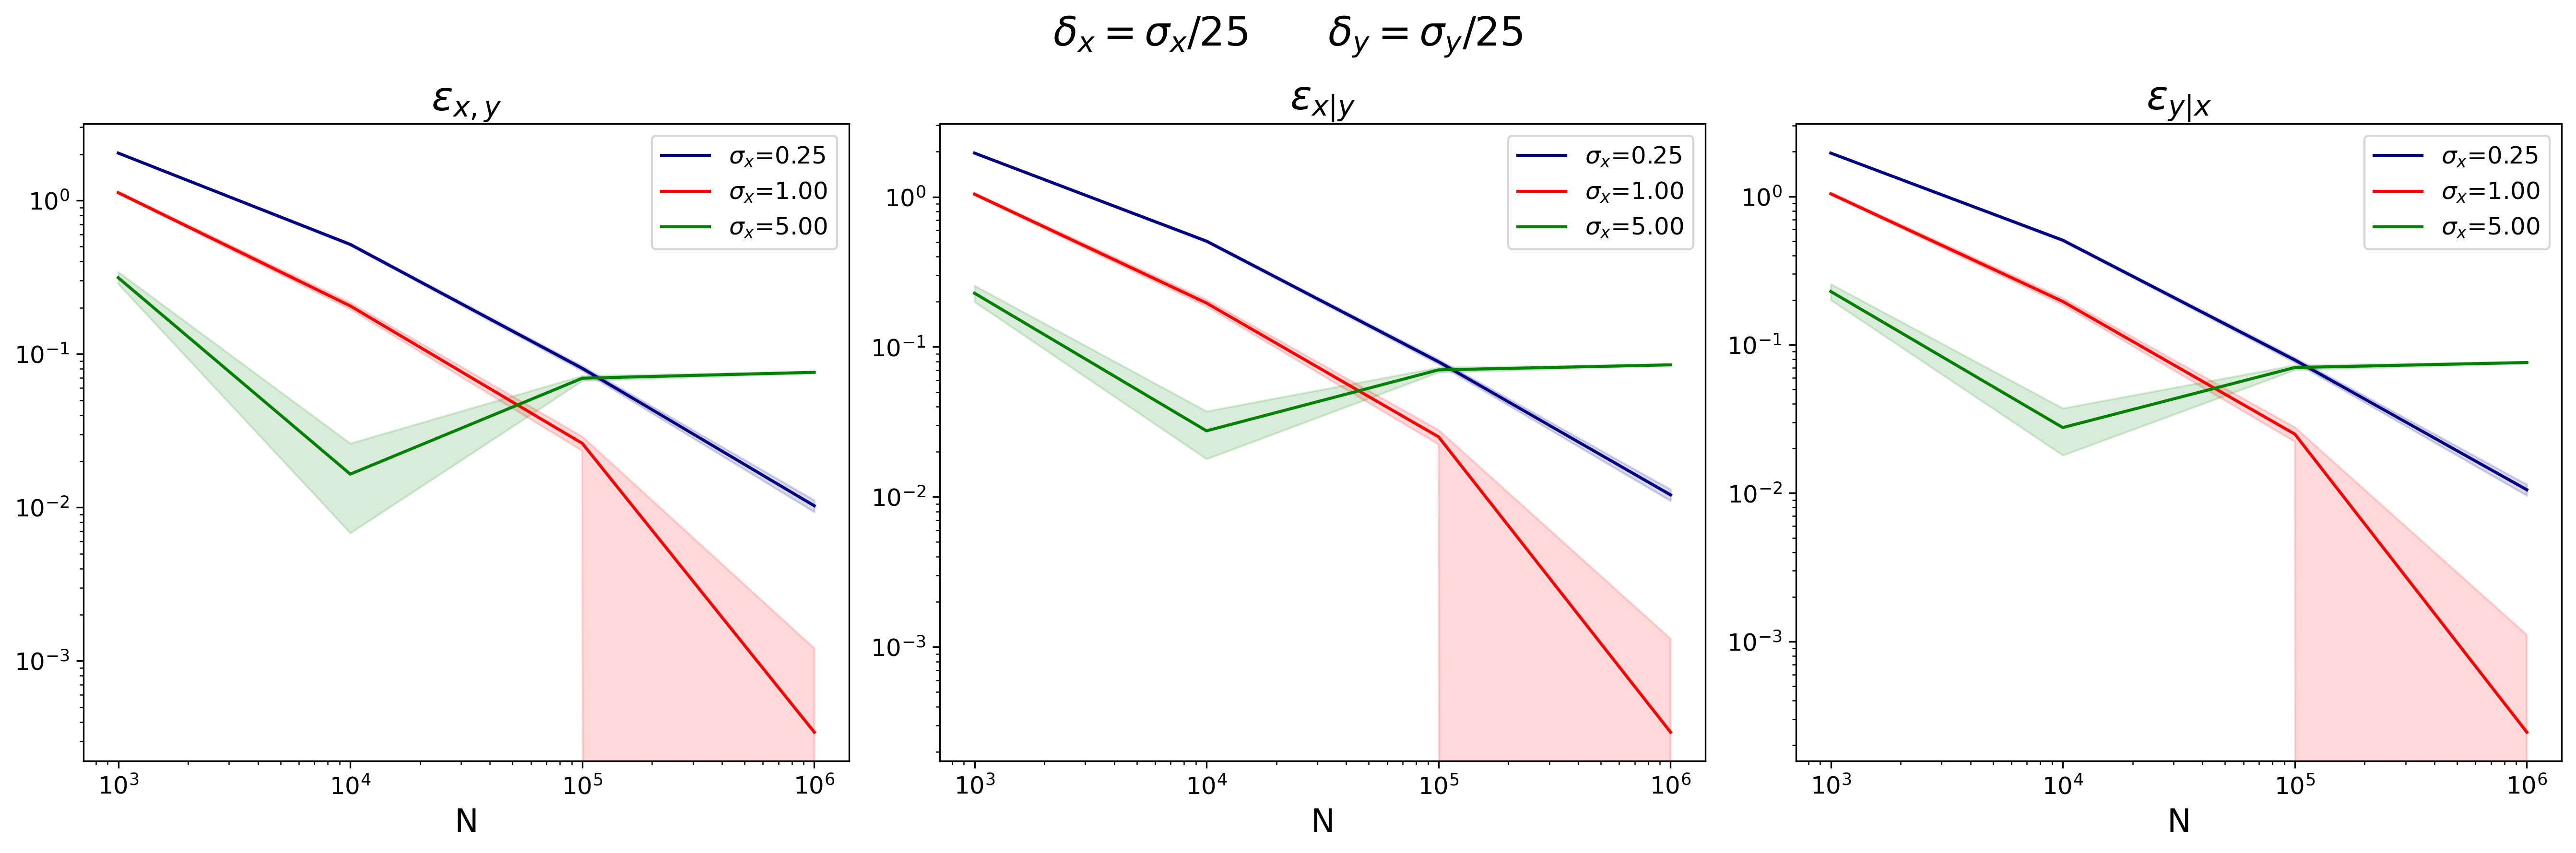

In [252]:
sx_range=np.array([0.25,1,5])
N_range=np.array([10**x for x in range(3,7)])
joint=[]
x_given_y=[]
y_given_x=[]
mutual=[]
KL=[]

a=1
b=2
mu_x=1
mu_z=0
sz=0.1


for n in range(50):
    joint_data=[]
    x_given_y_data=[]
    y_given_x_data=[]
    mutual_data=[]
    KL_data=[]
    for N in N_range:
        joint_emp=[]
        x_given_y_emp=[]
        y_given_x_emp=[]
        mutual_emp=[]
        KL_emp=[]
        for sx in sx_range:
            x=np.random.normal(loc=mu_x, scale=sx, size=N)
            z=np.random.normal(loc=mu_z, scale=sz, size=N)
            y=a*x+b*z
            dx=sx/25
            sy=np.sqrt(b**2*sz**2+a**2*sx**2)
            dy=sy/25
            dic=joint_pdf(x,y,delta_x=dx, delta_y=dy)
            H=differential_joint_entropy(dic)
            joint_emp.append(H['h_x,y'])
            x_given_y_emp.append(H['h_x|y'])
            y_given_x_emp.append(H['h_y|x'])
            mutual_emp.append(H['I_x;y'])
            KL_emp.append(KL_px_py(dic, y))
        joint_data.append(joint_emp)
        x_given_y_data.append(x_given_y_emp)
        y_given_x_data.append(y_given_x_emp)
        mutual_data.append(mutual_emp)
        KL_data.append(KL_emp)
            
    joint.append(np.array(joint_data).T)
    x_given_y.append(np.array(x_given_y_data).T)
    y_given_x.append(np.array(y_given_x_data).T)
    mutual.append(np.array(mutual_data).T)
    KL.append(np.array(KL_data).T)

joint_mean=np.mean(joint, axis=0)
joint_sigma=np.sqrt(np.var(joint, axis=0))
x_given_y_mean=np.mean(x_given_y, axis=0)
x_given_y_sigma=np.sqrt(np.var(x_given_y, axis=0))
y_given_x_mean=np.mean(y_given_x, axis=0)
y_given_x_sigma=np.sqrt(np.var(y_given_x, axis=0))
mutual_mean=np.mean(mutual, axis=0)
mutual_sigma=np.sqrt(np.var(mutual, axis=0))
KL_mean=np.mean(KL, axis=0)
KL_sigma=np.sqrt(np.var(KL, axis=0))



fig, ax= plt.subplots(1,3)
fig.set_dpi(300)
fig.set_size_inches(18,6)
fig.suptitle("$\delta_x= \sigma_x/25 \qquad \delta_y= \sigma_y/25$", fontsize=20)

colors=['navy', 'r', 'g']
for k,sx in enumerate(sx_range):
    theo_values=theoretical_values([sx**2, sz**2, mu_x, mu_z, a, b], case=2)


    ax[0].set_title("$\epsilon_{x,y}$", fontsize=20)
    eps=np.abs(joint_mean[k]-theo_values["h_x,y"])
    ax[0].plot(N_range, eps, c=colors[k], label="$\sigma_x$=%.2f" % sx)
    ax[0].fill_between(N_range, eps+joint_sigma[k],eps-joint_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{x|y}$", fontsize=20)
    eps=np.abs(x_given_y_mean[k]-theo_values["h_x|y"])
    ax[1].plot(N_range, eps, c=colors[k], label="$\sigma_x$=%.2f" % sx)
    ax[1].fill_between(N_range, eps+joint_sigma[k],eps-joint_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    ax[2].set_title("$\epsilon_{y|x}$", fontsize=20)
    eps=np.abs(y_given_x_mean[k]-theo_values["h_y|x"])
    ax[2].plot(N_range, eps , c=colors[k], label="$\sigma_x$=%.2f" % sx)
    ax[2].fill_between(N_range, eps+joint_sigma[k],eps-joint_sigma[k],
                         color=colors[k],alpha=0.15)

    ax[2].set_xscale("log")
    ax[2].set_yscale("log")
    ax[2].set_xlabel("N", fontsize=16)
    ax[2].tick_params(labelsize=12)

ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
ax[2].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()


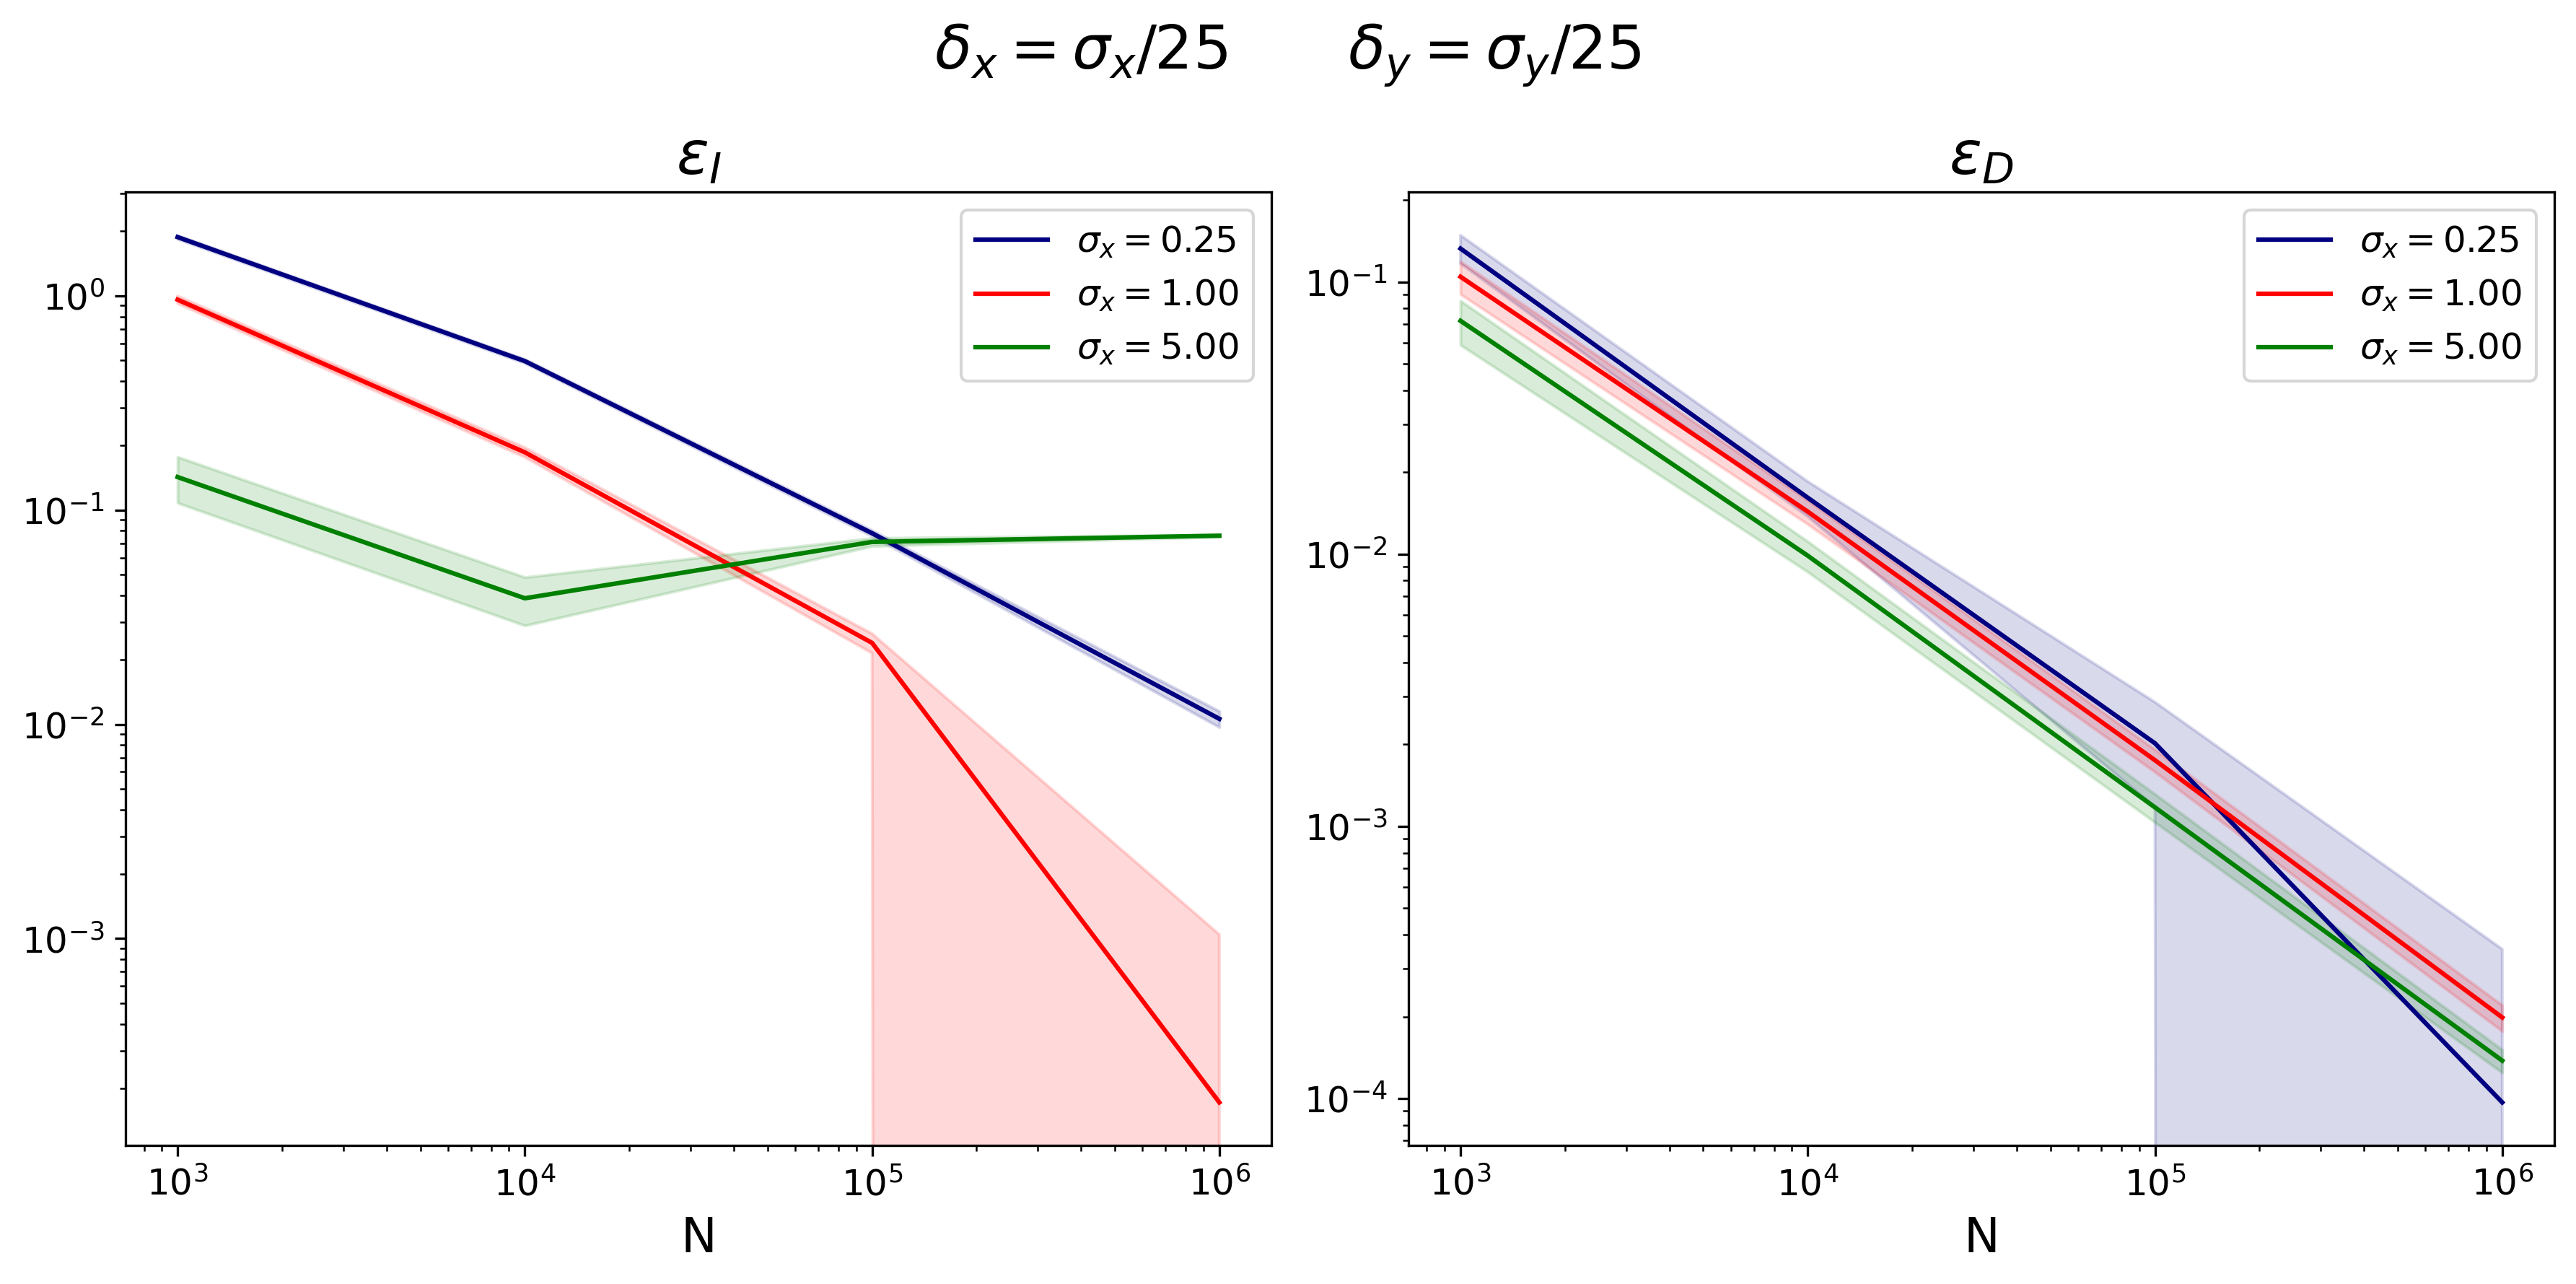

In [253]:
fig, ax= plt.subplots(1,2)
fig.set_dpi(300)
fig.set_size_inches(12,6)
fig.suptitle("$\delta_x= \sigma_x/25 \qquad \delta_y= \sigma_y/25$", fontsize=20)

colors=['navy', 'red', 'green']

for k,sx in enumerate(sx_range):
    theo_values=theoretical_values([sx**2, sz**2, mu_x, mu_z, a, b], case=2)
    ax[0].set_title("$\epsilon_{I}$", fontsize=20)
    eps=np.abs(mutual_mean[k]-theo_values["mutual"])
    ax[0].plot(N_range, eps, c=colors[k], label="$\sigma_x=%.2f$" % sx)
    ax[0].fill_between(N_range, eps+mutual_sigma[k],eps-mutual_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[0].set_xscale("log")
    ax[0].set_yscale("log")
    ax[0].set_xlabel("N", fontsize=16)
    ax[0].tick_params(labelsize=12)

    ax[1].set_title("$\epsilon_{D}$", fontsize=20)
    eps= np.abs(KL_mean[k]-theo_values["KL"])
    ax[1].plot(N_range,eps, c=colors[k], label="$\sigma_x=%.2f$" % sx)
    ax[1].fill_between(N_range, eps+KL_sigma[k],eps-KL_sigma[k],
                        color=colors[k], alpha=0.15)
    ax[1].set_xscale("log")
    ax[1].set_yscale("log")
    ax[1].set_xlabel("N", fontsize=16)
    ax[1].tick_params(labelsize=12)

    
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
fig.set_tight_layout(True)
plt.show()
